In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
%config InlineBackend.figure_format='retina'
%matplotlib inline
import matplotlib.font_manager as fm
font_path = "C:/Windows/Fonts/H2GTRE.TTF"
font_name = fm.FontProperties(fname=font_path).get_name()
plt.rc("font", family=font_name)
plt.rc("axes", unicode_minus=False) 

import warnings
warnings.filterwarnings(action='ignore')

In [2]:
students=pd.read_excel("data/2020 고등교육기관 외국인 유학생 현황.xlsx", index_col=None)

In [3]:
students.head(10)

,* 단위: 명,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28
0,연도,대륙,국가명,동포여부,총계,학위과정,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,공동운영\n교육과정,연수과정,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,대학·전문대학,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,계,인문사회,공학,자연,의학,...,공학,자연,의학,예체능,NaN,계,어학연수생,교환연수생,방문연수생,기타연수생
3,2020,아시아,중국,,65318,37698,26680,3240,1765,1,...,749,423,120,3001,1008,6785,5208,1133,15,429
4,2020,아시아,베트남,,38324,16007,12481,1812,1212,0,...,567,268,51,3,16,19158,18906,248,0,4
5,2020,아시아,우즈베키스탄,,9044,5780,4063,984,284,0,...,52,9,6,3,0,1655,1558,97,0,0
6,2020,아시아,몽골,,6834,2469,1309,543,211,0,...,49,44,10,6,56,1556,1473,71,0,12
7,2020,아시아,일본,,3150,1680,1386,101,68,1,...,2,5,1,0,26,1215,873,312,5,25
8,2020,아시아,네팔,,2564,1769,1347,251,111,0,...,55,49,16,0,0,319,317,0,1,1
9,2020,아시아,중국,재외동포,1712,997,667,109,62,0,...,38,47,43,42,1,59,53,6,0,0


In [4]:
# students.columns = ['번호','연도','대륙','국가명','동표여부','총계',
#          '대학-전문대학_계','대학-전문대학_인문사회','대학-전문대학_공학','대학-전문대학_자연',
#          '대학-전문대학_의학','대학-전문대학_예체능','석사_계','석사_인문사회','석사_공학','석사_자연'
#                 ,'석사_의학','석사_예체능','박사_계','박사_인문사회','박사_공학','박사_자연','박사_의학',
#                '박사_예체능','공동운영교육과정','연수_계','연수_어학연수상','연수_교환연수상','연수_방문연수상',
#                '연수_기타연구상']
students.columns = ['연도','대륙','국가명','동표여부','총계',
         '대학-전문대학_계','대학-전문대학_인문사회','대학-전문대학_공학','대학-전문대학_자연',
         '대학-전문대학_의학','대학-전문대학_예체능','석사_계','석사_인문사회','석사_공학','석사_자연'
                ,'석사_의학','석사_예체능','박사_계','박사_인문사회','박사_공학','박사_자연','박사_의학',
               '박사_예체능','공동운영교육과정','연수_계','연수_어학연수상','연수_교환연수상','연수_방문연수상',
               '연수_기타연구상']

In [5]:
students.drop(index=[0,1,2],axis=0 ,inplace=True)
# students.drop(index=[0,1,2,3],axis=0 ,inplace=True)
students.index=range(len(students))
# students.drop(columns=['연도','번호'],axis=1,inplace=True)
students.drop(columns=['연도'],axis=1,inplace=True)

In [6]:
print(students.isnull().sum()) #결측치 없음!
print('===================================')
print(students.info())

대륙              0
국가명             0
동표여부            0
총계              0
대학-전문대학_계       0
대학-전문대학_인문사회    0
대학-전문대학_공학      0
대학-전문대학_자연      0
대학-전문대학_의학      0
대학-전문대학_예체능     0
석사_계            0
석사_인문사회         0
석사_공학           0
석사_자연           0
석사_의학           0
석사_예체능          0
박사_계            0
박사_인문사회         0
박사_공학           0
박사_자연           0
박사_의학           0
박사_예체능          0
공동운영교육과정        0
연수_계            0
연수_어학연수상        0
연수_교환연수상        0
연수_방문연수상        0
연수_기타연구상        0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229 entries, 0 to 228
Data columns (total 28 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   대륙            229 non-null    object
 1   국가명           229 non-null    object
 2   동표여부          229 non-null    object
 3   총계            229 non-null    object
 4   대학-전문대학_계     229 non-null    object
 5   대학-전문대학_인문사회  229 non-null    object
 6   대학-전문대학_공학    229 non-null    object


In [7]:
students=students.loc[:,'대륙':'동표여부'].join(students.loc[:,'총계':'연수_기타연구상'].apply(pd.to_numeric))

In [8]:
students.shape
students.sort_values(by='총계',ascending=False).head(10)

,대륙,국가명,동표여부,총계,대학-전문대학_계,대학-전문대학_인문사회,대학-전문대학_공학,대학-전문대학_자연,대학-전문대학_의학,대학-전문대학_예체능,...,박사_공학,박사_자연,박사_의학,박사_예체능,공동운영교육과정,연수_계,연수_어학연수상,연수_교환연수상,연수_방문연수상,연수_기타연구상
0,아시아,중국,,65318,37698,26680,3240,1765,1,6012,...,749,423,120,3001,1008,6785,5208,1133,15,429
1,아시아,베트남,,38324,16007,12481,1812,1212,0,502,...,567,268,51,3,16,19158,18906,248,0,4
2,아시아,우즈베키스탄,,9044,5780,4063,984,284,0,449,...,52,9,6,3,0,1655,1558,97,0,0
3,아시아,몽골,,6834,2469,1309,543,211,0,406,...,49,44,10,6,56,1556,1473,71,0,12
4,아시아,일본,,3150,1680,1386,101,68,1,124,...,2,5,1,0,26,1215,873,312,5,25
5,아시아,네팔,,2564,1769,1347,251,111,0,60,...,55,49,16,0,0,319,317,0,1,1
6,아시아,중국,재외동포,1712,997,667,109,62,0,159,...,38,47,43,42,1,59,53,6,0,0
7,아시아,파키스탄,,1500,352,260,53,7,0,32,...,440,90,17,1,0,34,26,7,0,1
8,북아메리카,미국,,1495,528,402,45,43,10,28,...,9,15,12,6,1,558,238,275,41,4
9,아시아,인도네시아,,1475,524,317,113,30,0,64,...,141,89,6,1,24,292,142,126,23,1


# 나라별 분포 pie시각화

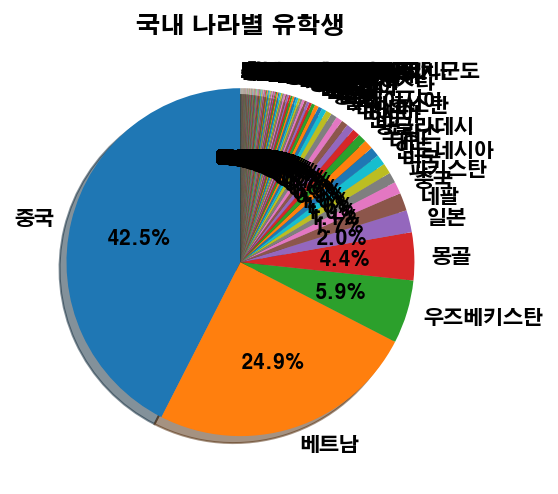

In [9]:
country_students=students[['국가명','총계']]
country_students.index=country_students['국가명']
country_students.drop(columns='국가명',inplace=True)
country_students=country_students.T
labels=list(country_students.columns)
ratio=country_students.values.tolist()[0]
plt.pie(ratio, labels=labels, autopct='%.1f%%',shadow=True, startangle=90)
plt.title('국내 나라별 유학생')
plt.show()


In [10]:
top10=students.sort_values(by='총계',ascending=False).head(10)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, '중국'),
  Text(1, 0, '베트남'),
  Text(2, 0, '우즈베키스탄'),
  Text(3, 0, '몽골'),
  Text(4, 0, '일본'),
  Text(5, 0, '네팔'),
  Text(6, 0, '파키스탄'),
  Text(7, 0, '미국'),
  Text(8, 0, '인도네시아')])

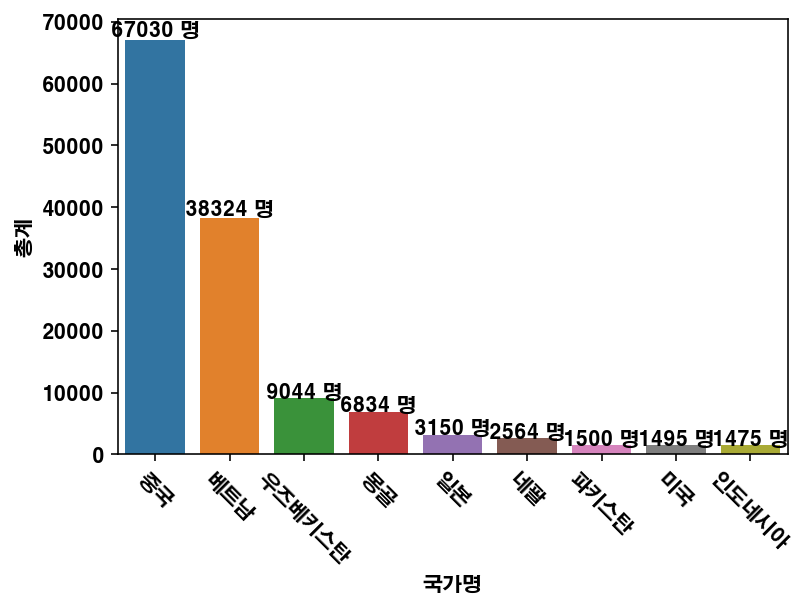

In [11]:
plt.xticks(rotation = - 45 )
ax=sns.barplot(x="국가명", y="총계", data=top10 , ci=None,estimator=np.sum)
for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    ax.annotate("%.f 명"%(height), (left+width/2, height*1.01), ha='center')
plt.xticks(rotation = - 45 )



# 중국유학생 학위 분포 및 분야별 

In [12]:
only_china_students=students.loc[students['국가명']=='중국']
df_china_students=pd.DataFrame(only_china_students.sum(axis=0)).T
df_china_students

,대륙,국가명,동표여부,총계,대학-전문대학_계,대학-전문대학_인문사회,대학-전문대학_공학,대학-전문대학_자연,대학-전문대학_의학,대학-전문대학_예체능,...,박사_공학,박사_자연,박사_의학,박사_예체능,공동운영교육과정,연수_계,연수_어학연수상,연수_교환연수상,연수_방문연수상,연수_기타연구상
0,아시아아시아,중국중국,재외동포,67030,38695,27347,3349,1827,1,6171,...,787,470,163,3043,1009,6844,5261,1139,15,429


In [13]:
df_china_students.loc[:,['총계','대학-전문대학_계','대학-전문대학_인문사회','대학-전문대학_공학', '대학-전문대학_자연','대학-전문대학_의학', '대학-전문대학_예체능']]

,총계,대학-전문대학_계,대학-전문대학_인문사회,대학-전문대학_공학,대학-전문대학_자연,대학-전문대학_의학,대학-전문대학_예체능
0,67030,38695,27347,3349,1827,1,6171


In [14]:
df_china_students.columns

Index(['대륙', '국가명', '동표여부', '총계', '대학-전문대학_계', '대학-전문대학_인문사회', '대학-전문대학_공학',
       '대학-전문대학_자연', '대학-전문대학_의학', '대학-전문대학_예체능', '석사_계', '석사_인문사회', '석사_공학',
       '석사_자연', '석사_의학', '석사_예체능', '박사_계', '박사_인문사회', '박사_공학', '박사_자연',
       '박사_의학', '박사_예체능', '공동운영교육과정', '연수_계', '연수_어학연수상', '연수_교환연수상',
       '연수_방문연수상', '연수_기타연구상'],
      dtype='object')

In [15]:
degree=df_china_students.loc[:,['총계','대학-전문대학_계','석사_계','박사_계']]

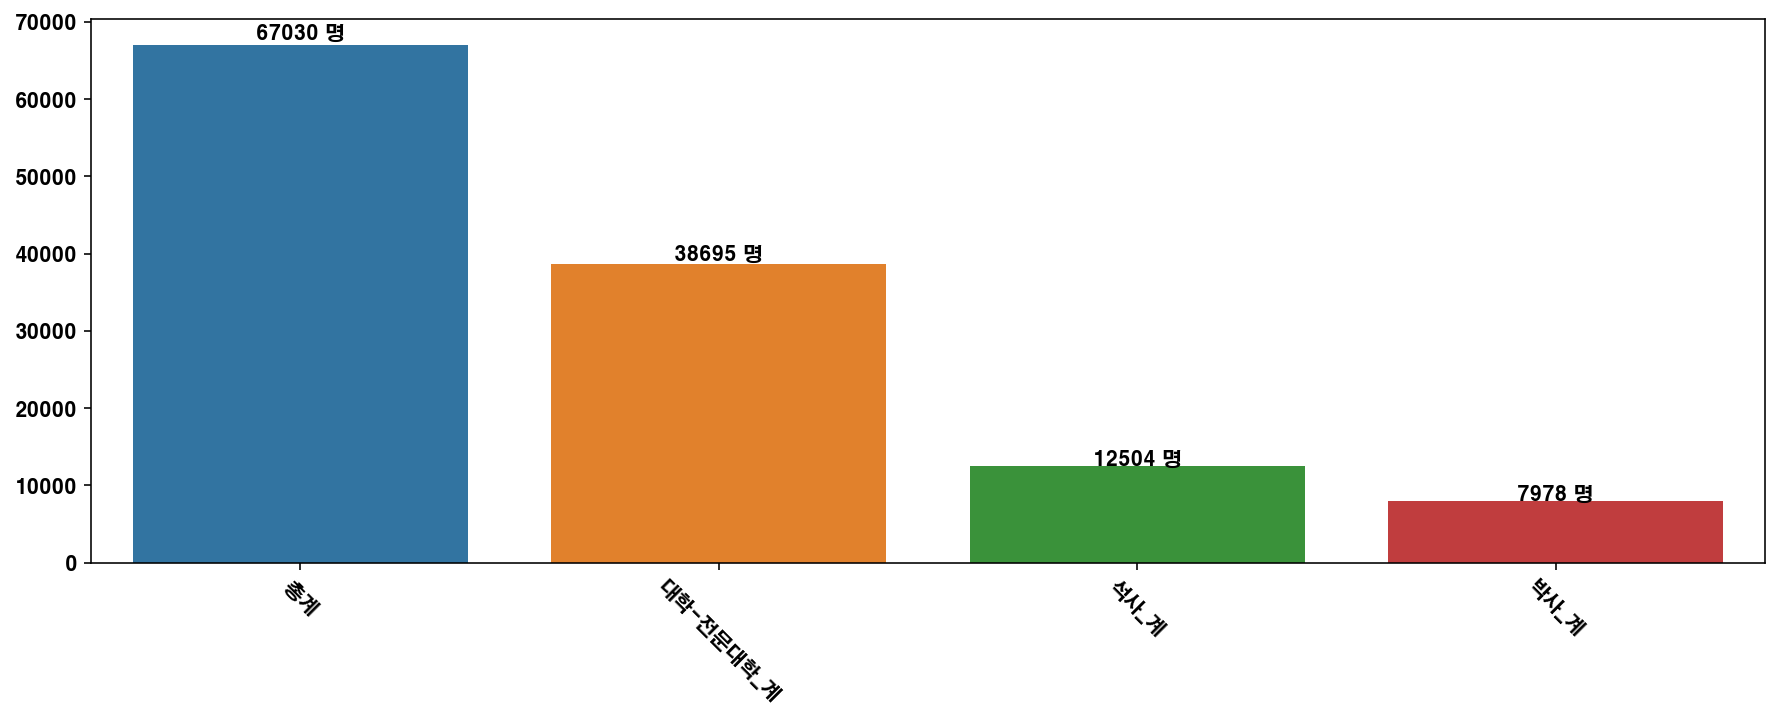

In [16]:
plt.figure(figsize=(15, 5))
plt.xticks(rotation = - 45 )
ax=sns.barplot(data=degree , ci=None , estimator=np.sum)
for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    ax.annotate("%.f 명"%(height), (left+width/2, height*1.01), ha='center')
plt.rc('font', size=10)

In [17]:
china_all_degree=df_china_students.loc[:,'대학-전문대학_계':'박사_예체능']

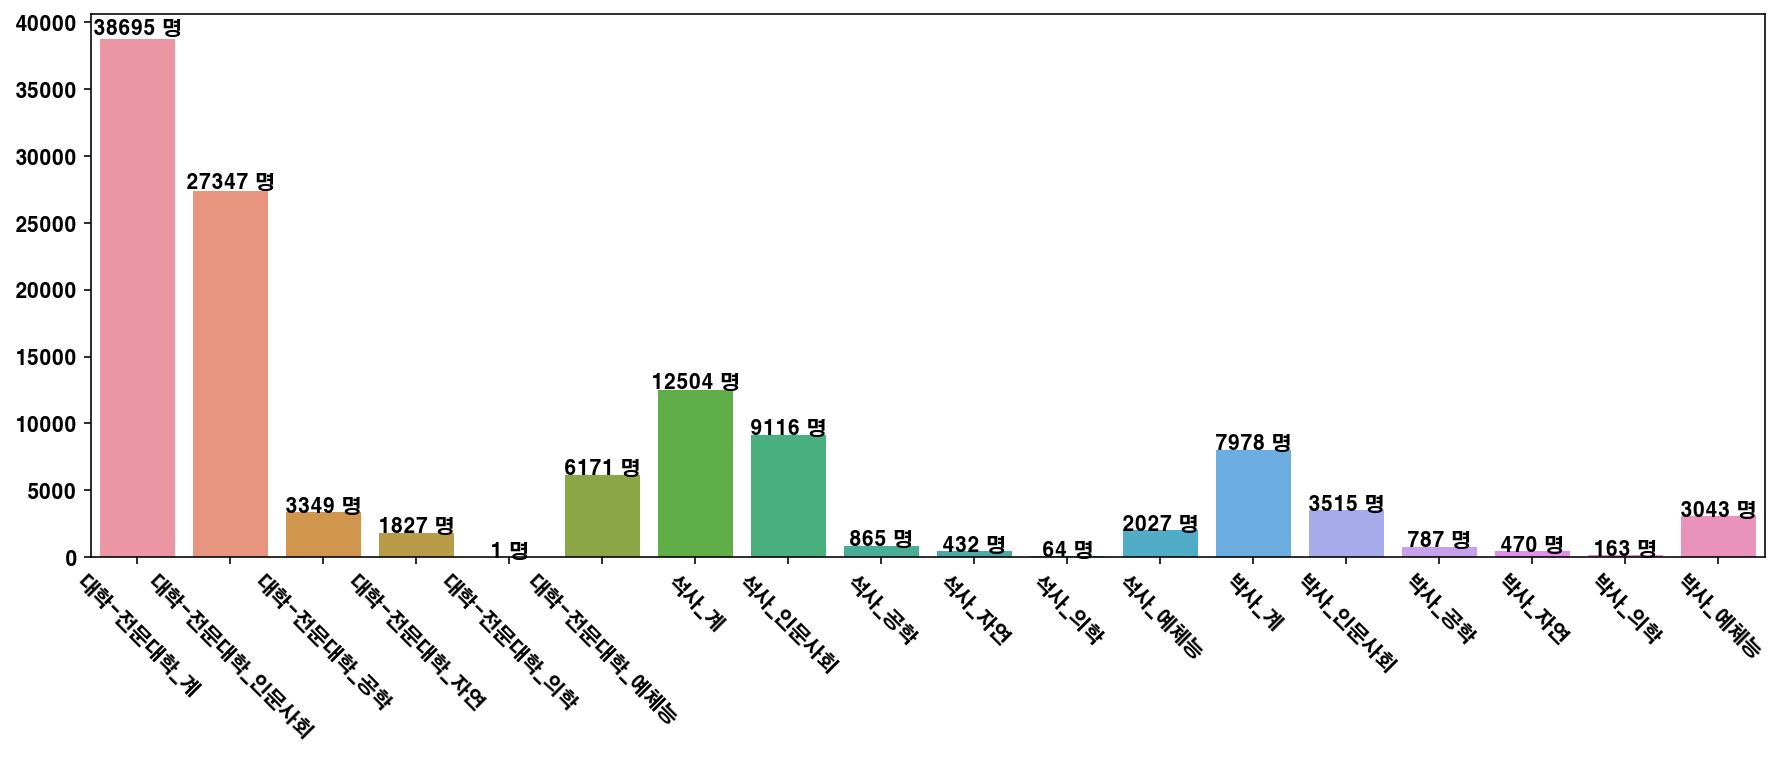

In [18]:
plt.figure(figsize=(15, 5))
plt.xticks(rotation = - 45 )
ax=sns.barplot( data=china_all_degree , ci=None , estimator=np.sum)
for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    ax.annotate("%.f 명"%(height), (left+width/2, height*1.01), ha='center')

# 2020년 국내 중국 유학생  학교 top10

In [19]:
country_students=pd.read_excel("data/2020 고등교육기관 외국인 유학생 현황.xlsx",sheet_name=1,index_col=None)

In [20]:
country_students

,* 단위: 명,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35
0,연도,학제,학교명,학교상태,본분교,시도,시군구,설립,대륙,국가명,...,NaN,NaN,NaN,NaN,공동운영\n교육과정,연수과정,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,공학,자연,의학,예체능,NaN,계,어학연수생,교환연수생,방문연수생,기타연수생
3,2020,대학교,경희대학교,기존,본교,서울,서울 동대문구,사립,아시아,중국,...,0,0,0,0,0,355,320,34,0,1
4,2020,대학교,성균관대학교,기존,본교,서울,서울 종로구,사립,아시아,중국,...,0,0,0,0,0,196,138,54,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9775,2020,기능대학,한국폴리텍 Ⅵ 대학 영주캠퍼스,기존,본교,경북,경북 영주시,사립,아시아,필리핀,...,0,0,0,0,0,0,0,0,0,0
9776,2020,기능대학,한국폴리텍 Ⅵ 대학 영주캠퍼스,기존,본교,경북,경북 영주시,사립,아시아,베트남,...,0,0,0,0,0,0,0,0,0,0
9777,2020,기능대학,한국폴리텍대학 창원캠퍼스,기존,본교,경남,경남 창원시,사립,아시아,베트남,...,0,0,0,0,0,0,0,0,0,0
9778,2020,기능대학,한국폴리텍 VII 대학 울산캠퍼스,기존,본교,울산,울산 중구,사립,남아메리카,페루,...,0,0,0,0,0,0,0,0,0,0


In [21]:
country_students.drop(index=[0,1,2],axis=0 ,inplace=True)

In [22]:
country_students.shape

(9777, 36)

In [23]:
country_students.columns=['연도','학제','학교명','학교상태','본분교','시도',
                         '시군구','설립','대륙','국가명','동포여부','총계',
                         '대학-전문대학_계','대학-전문대학_인문사회','대학-전문대학_공학','대학-전문대학_자연',
                         '대학-전문대학_의학','대학-전문대학_예체능','석사_계','석사_인문사회','석사_공학','석사_자연'
                        ,'석사_의학','석사_예체능','박사_계','박사_인문사회','박사_공학','박사_자연','박사_의학',
                           '박사_예체능','공동운영교육과정','연수_계','연수_어학연수상','연수_교환연수상','연수_방문연수상',
                           '연수_기타연구상']

In [24]:
country_students.drop(columns=['연도'],axis=1,inplace=True)

In [25]:
china_students=country_students.loc[country_students['국가명']=='중국']

In [26]:
china_students.loc[:,['학제','학교명','국가명','총계']].head(10)

,학제,학교명,국가명,총계
3,대학교,경희대학교,중국,2603
4,대학교,성균관대학교,중국,2519
5,대학교,중앙대학교 서울캠퍼스,중국,1833
6,대학교,한양대학교,중국,1781
7,대학교,고려대학교,중국,1753
9,대학교,국민대학교,중국,1576
11,대학교,한국외국어대학교,중국,1262
12,대학교,건국대학교,중국,1240
14,대학교,동국대학교,중국,1181
15,대학교,숭실대학교,중국,1169


In [27]:
china_students.loc[:,['학교명','총계']].head(10)

,학교명,총계
3,경희대학교,2603
4,성균관대학교,2519
5,중앙대학교 서울캠퍼스,1833
6,한양대학교,1781
7,고려대학교,1753
9,국민대학교,1576
11,한국외국어대학교,1262
12,건국대학교,1240
14,동국대학교,1181
15,숭실대학교,1169


<AxesSubplot:xlabel='학교명', ylabel='총계'>

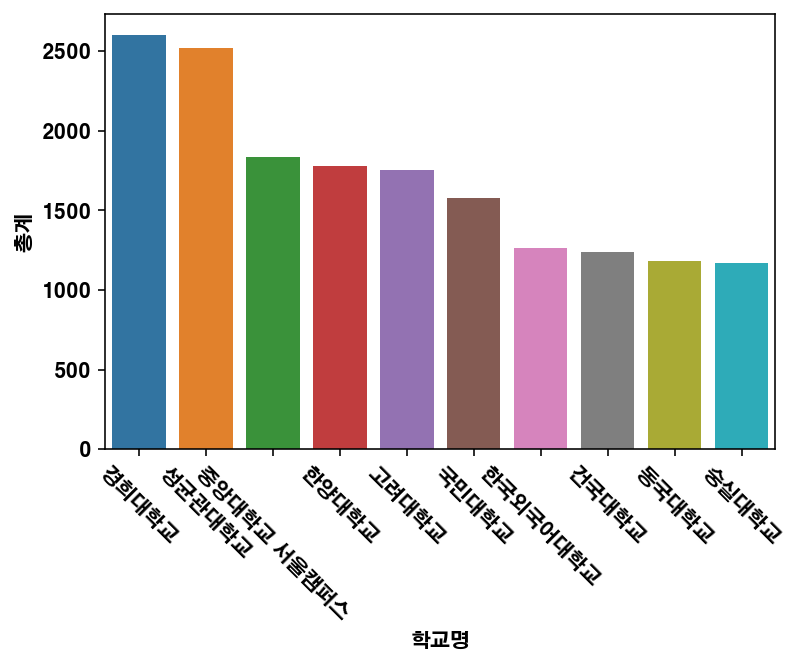

In [28]:
plt.xticks(rotation = - 45 )
sns.barplot(x="학교명", y="총계", data=china_students.loc[:,['학제','학교명','국가명','총계']].head(10) , ci=None , estimator=np.sum)

In [29]:
university=pd.read_excel('data/대학교 위도 경도 자료.xlsx',index_col=None)

In [30]:
one=china_students.loc[:,'학교명'].head(10)

In [31]:
result = False
for i in range(len(one)):
    temp = university['대학교이름'].str.find(one.iloc[i])!= -1
    result = result | temp

university[result]

,대학교이름,주소,x,y
5,건국대학교,서울시 광진구 능동로 120,127.073699,37.542524
7,경희대학교,서울특별시 동대문구 경희대로 26,127.051410,37.597063
8,고려대학교,서울특별시 성북구 안암로 145,127.032519,37.588601
10,국민대학교,서울특별시 성북구 정릉로 77,126.997679,37.610895
12,동국대학교,서울특별시 중구 필동로 1길30,126.998746,37.559061
26,성균관대학교,서울특별시 종로구 성균관로 25-2,126.992064,37.588469
31,숭실대학교,서울특별시 동작구 상도로 369,126.957201,37.496335
35,중앙대학교 서울캠퍼스,서울특별시 동작구 흑석로 84,126.955319,37.504659
42,한국외국어대학교,서울특별시 동대문구 이문로 107,127.058748,37.597448
45,한양대학교,서울특별시 성동구 왕십리로 222,127.048995,37.557124


In [32]:
ex=university[result]

No handles with labels found to put in legend.


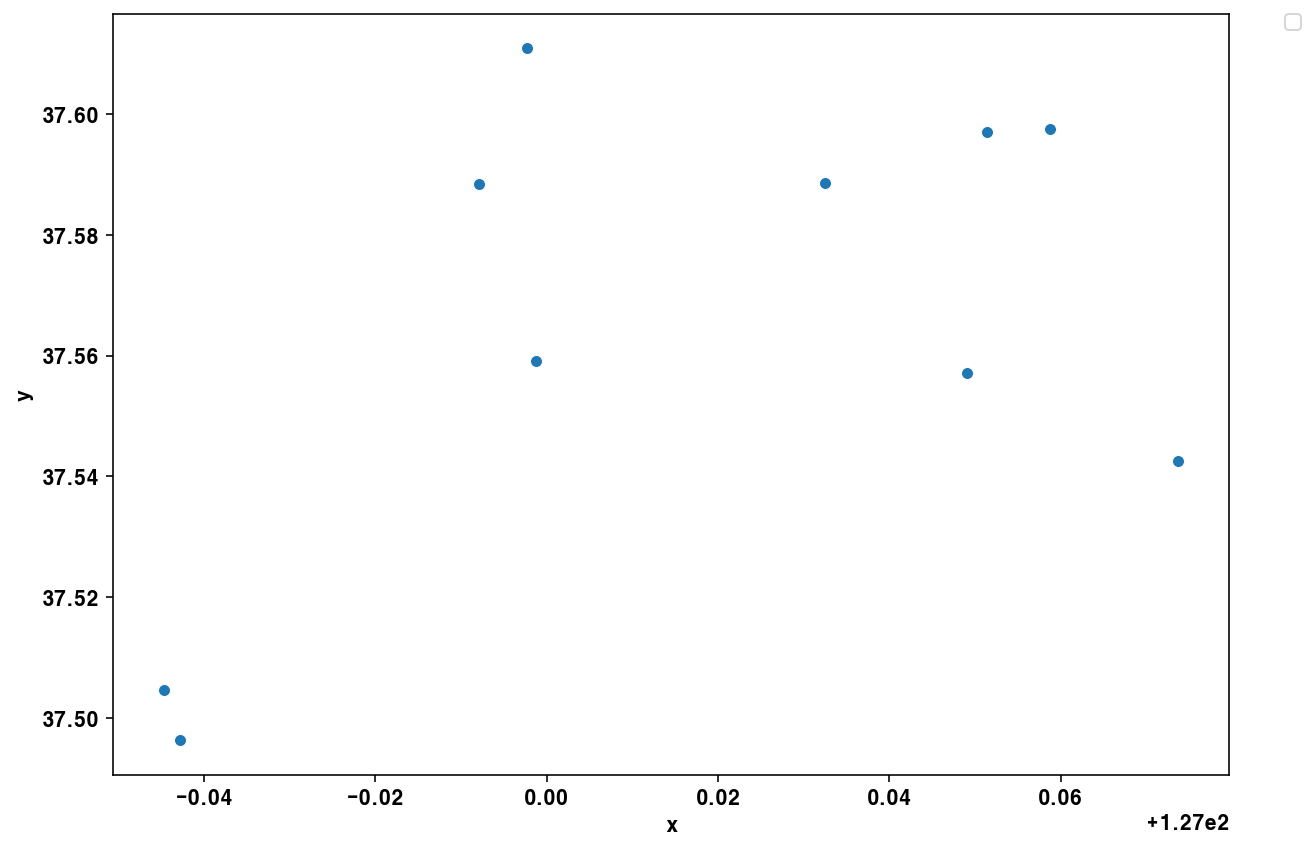

In [33]:
plt.figure(figsize=(10,7))
sns.scatterplot(data=university[result], x="x", y="y", )
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

In [36]:
lat=ex['경도'].mean() #y 경도
long=ex['위도'].mean() #x 위도 
m = folium.Map([lat,long],zoom_start=10.5)
m

In [37]:
import folium
#x는 위도 y는 경도
ex.columns=['대학교 이름','주소','위도','경도'] 
for item in ex.index:
    lat=ex.loc[item,'위도']
    long=ex.loc[item,'경도']
    tooltip='사고!'
    folium.Marker([long,lat],popup='위험').add_to(m)
m